# Lab 1 | Cleaning numerical data

## Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

1. Import the necessary libraries.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [51]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info).

In [52]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [53]:
customer_df.shape

(9134, 24)

In [54]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns so they follow the PE8 (snake case).

In [55]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

In [56]:
customer_df = customer_df.rename(columns = {'employmentstatus': 'employment_status'})
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

5. Change effective to date column to datetime format.

In [57]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

6. Check NaN values per column.

In [58]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

7. Define a function that differentiates between continuous and discrete variables (Hint: A number of unique values might be useful). 
Store continuous data into a continuous variable and do the same for discrete and categorical.

In [59]:
def funk(df):
    categoricals = df.select_dtypes('object')
    discrete = df.select_dtypes('int64')
    continuous = df.select_dtypes('float64')
    return categoricals, discrete, continuous
categoricals, discrete, continuous = funk(customer_df)

8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [61]:
for col in categoricals:
    print(categoricals[col].value_counts(), '\n')

ZO44848    1
WO39817    1
UH65059    1
IH23596    1
NB30472    1
          ..
UQ62739    1
AK17025    1
ES21306    1
XA55917    1
HK96298    1
Name: customer, Length: 9134, dtype: int64 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64 

F    4658
M    4476
Name: gender, dtype: int64 

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64 

P

9. Get categorical features.

In [62]:
categoricals.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


10. What should we do with the customer_id column?

In [63]:
customer_df0 = customer_df.copy()

In [64]:
# Customer is just a label, it doesn't store other information.
customer_df0 = customer_df.set_index('customer', drop=True)
customer_df0.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Lab 2 | Cleaning categorical data

1. Import the necessary libraries if you are starting a new notebook.

In [65]:
# Done

2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [66]:
continuous_df0 = customer_df0.select_dtypes('float64')

In [67]:
discrete_df0 = customer_df0.select_dtypes('int64')

3. Plot a correlation matrix, what can you see?

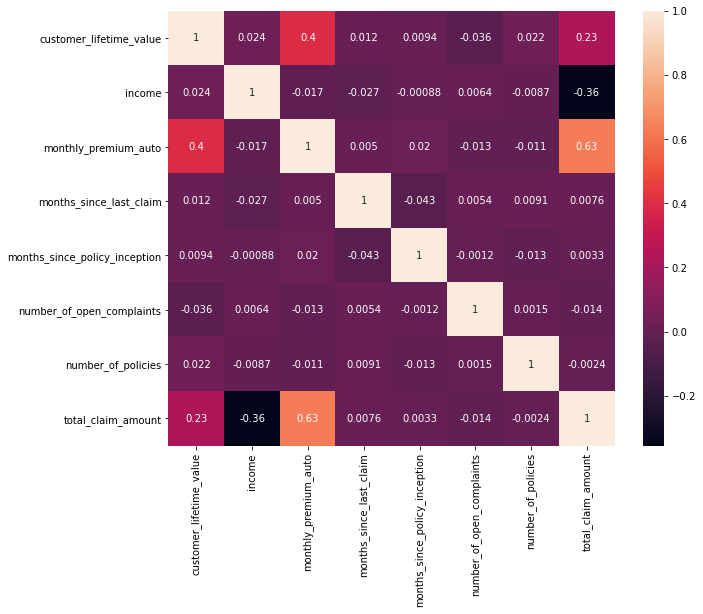

In [68]:
corr_matrix = customer_df0.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Only one pair of parameters are clearly correlated with each other, namely: 
- monthly_premium_auto with total_claim_amount (0.63)
Two other pair of parameters are correlated with each other:
- monthly_premium_auto with customer_lifetime_value (0.4)
- total_claim_amount with customer_lifetime_value (0.23) 

Besides, total_claim_amount and income have slightly negative correlated between each other (-0.36).

4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

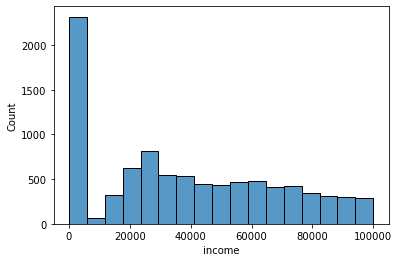

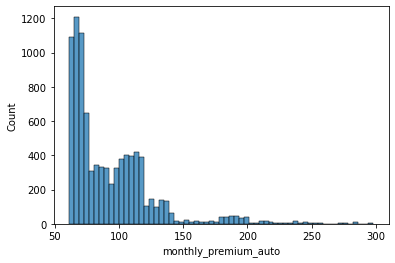

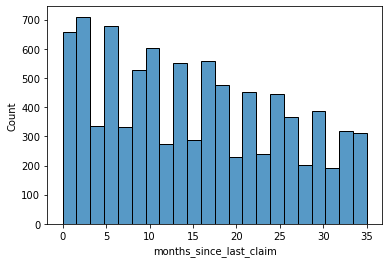

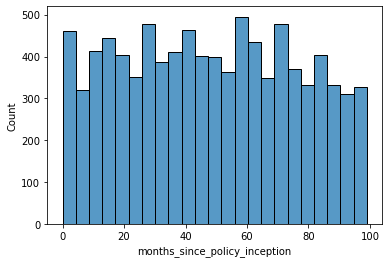

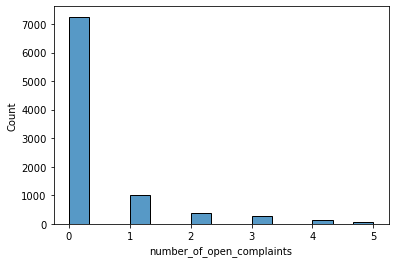

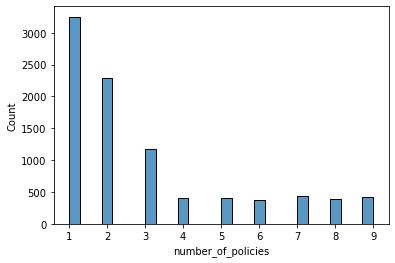

In [69]:
for col in discrete_df0.columns:
    sns.histplot(customer_df0[col])
    plt.show()

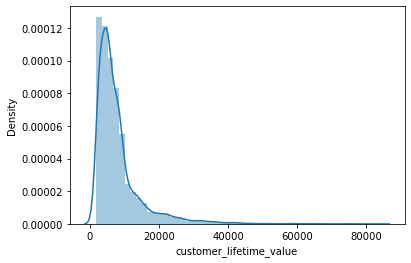

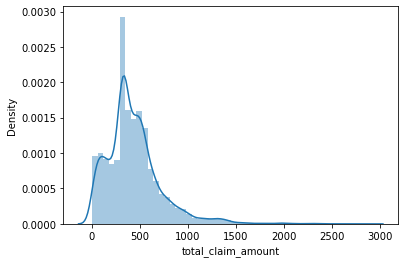

In [70]:
for col in customer_df0.select_dtypes(['float64']).columns:
    sns.distplot(customer_df0[col])
    plt.show()

5. What can you see in the plots?
- Some of the features must be ingeneered: for example, 'income' can't be zero for such a large proportion of customers. Most probably, the information hasn't been collected.

6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

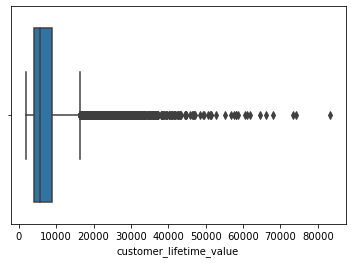

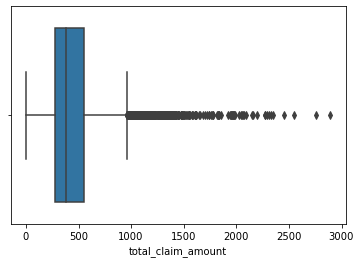

In [71]:
for col in customer_df0.select_dtypes(['float64']).columns:
    sns.boxplot(customer_df0[col])
    plt.show()

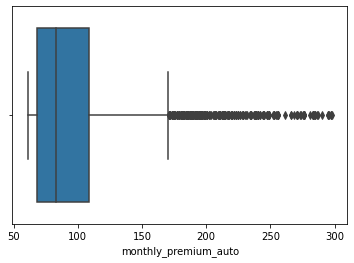

In [72]:
#Despite being integers, we can't really say that this column correspond to discrete values:
sns.boxplot(customer_df0['monthly_premium_auto'])
plt.show()

7. Have you found outliers? If you have, what should we do with them?
- Eventually we'll drop them if necessary, after checking our benchmark model with unprocessed data

8. Check nan values per column.
- See above question 6 of the first part.

9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.


The definition of continuous and discrete functions above isn't really satisfying. We'll try to redefine continuous and discrete in function of unique values. 

Arbitrarly: 
 * discrete < 100 unique values 
 * continuous >= 100 unique values

In [73]:
numericals0 = customer_df0.select_dtypes(np.number)
numericals0

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


In [74]:
for col in customer_df0.select_dtypes(np.number).columns:
    print([col], ":",  "number of unique values:", len(customer_df0[col].unique()), "\n")

['customer_lifetime_value'] : number of unique values: 8041 

['income'] : number of unique values: 5694 

['monthly_premium_auto'] : number of unique values: 202 

['months_since_last_claim'] : number of unique values: 36 

['months_since_policy_inception'] : number of unique values: 100 

['number_of_open_complaints'] : number of unique values: 6 

['number_of_policies'] : number of unique values: 9 

['total_claim_amount'] : number of unique values: 5106 



In [77]:
discrete0 = customer_df0[['months_since_last_claim','number_of_open_complaints','number_of_policies']]
discrete0.shape

(9134, 3)

In [78]:
continuous0 = customer_df0[['customer_lifetime_value', 'income','monthly_premium_auto','months_since_policy_inception','total_claim_amount']]
continuous0.shape

(9134, 5)

def sort_numerical_values(customer_df0):

    for col in customer_df0.select_dtypes(np.number)[col]:
        if len(customer_df0[col].unique()) < 100: 
            discrete0 = customer_df0[customer_df0[col]]
        else:
            continuous0 = customer_df0[customer_df0[col]]
    return discrete0, categorical0

10. Get categorical features.

In [79]:
categoricals0 = customer_df0.select_dtypes('object')
categoricals0.shape

(9134, 14)

11. What should we do with the customer id column?
- Remove it from the features and set it to the index, since they are just a label (already done in previous lab) 

# Lab 3 | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

1. Open the categoricals variable we created before.


In [80]:
categoricals0.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


2. Plot all the categorical variables with the proper plot. What can you see?

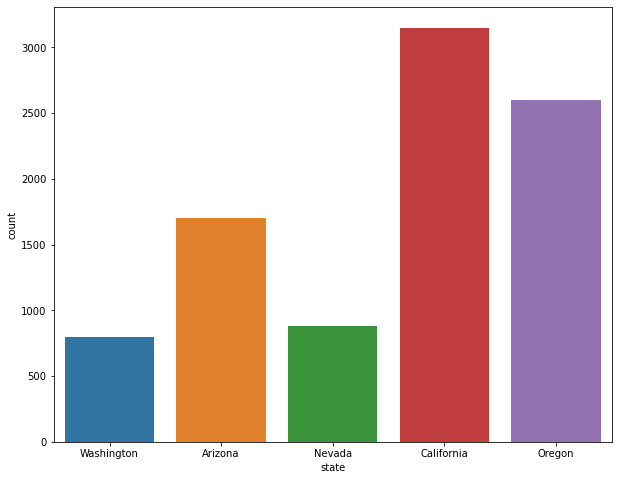

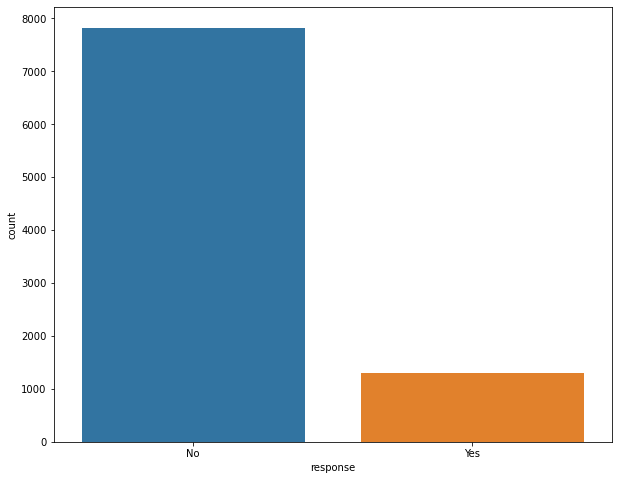

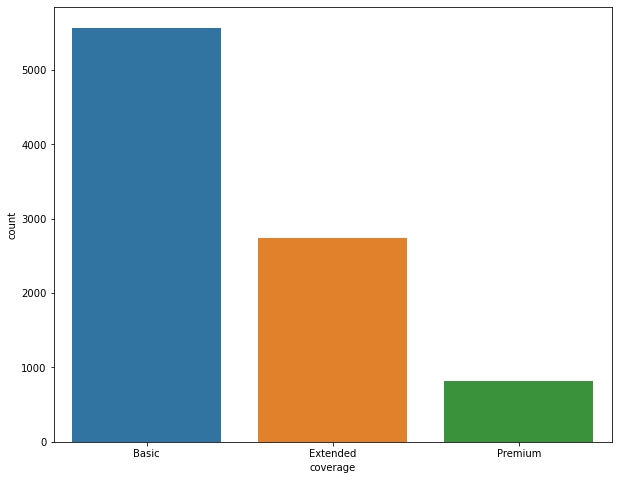

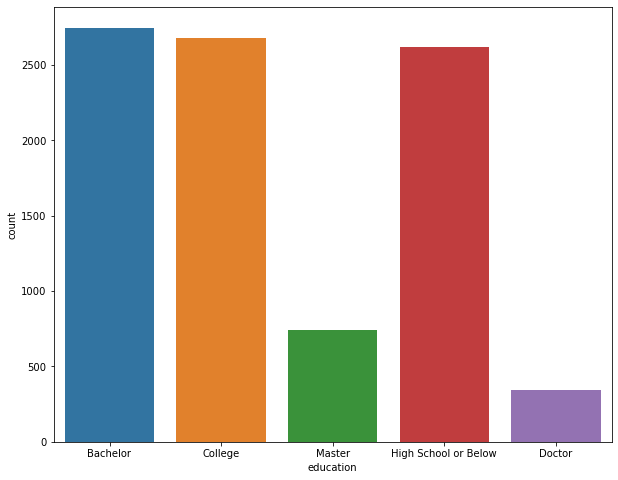

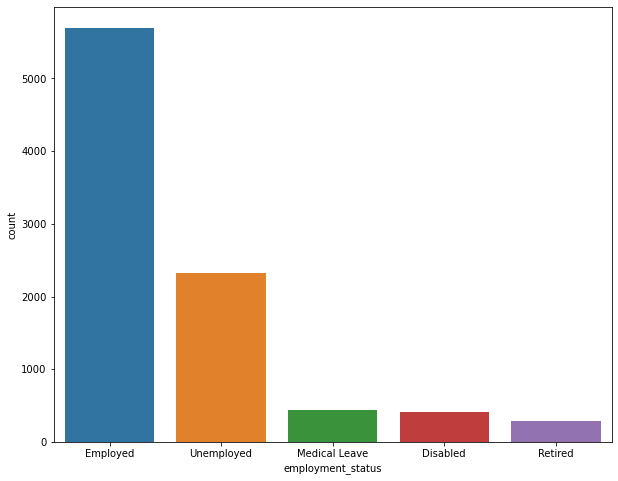

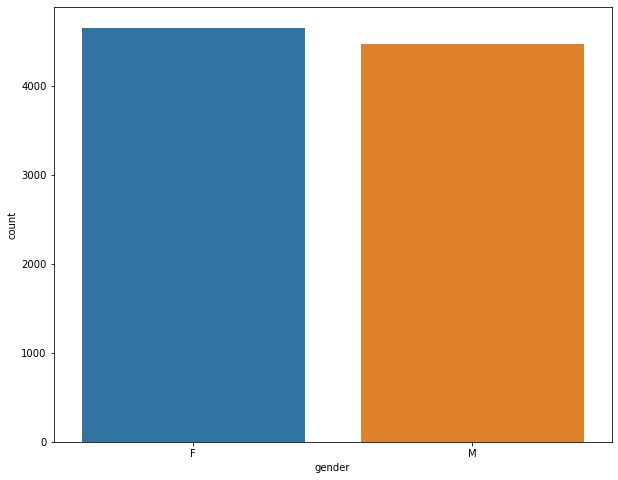

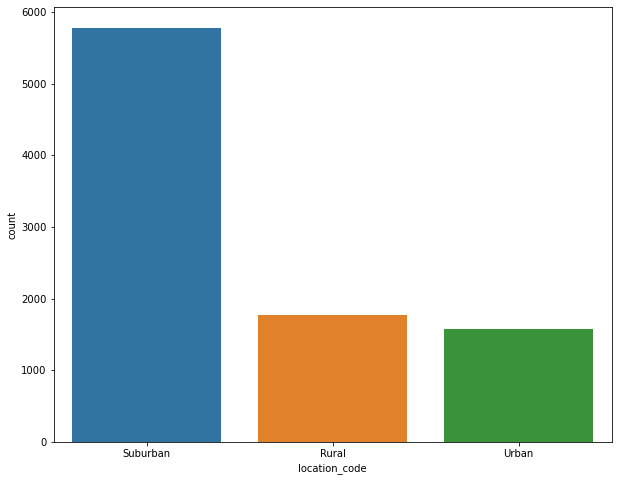

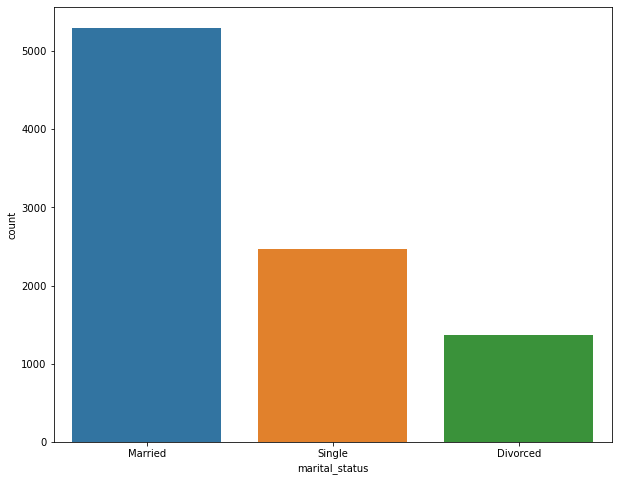

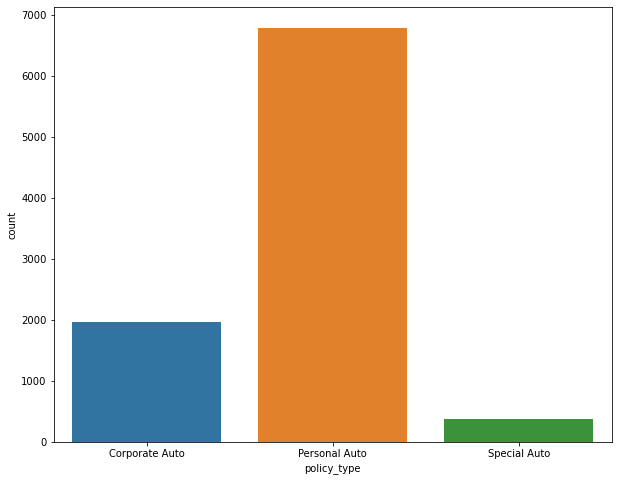

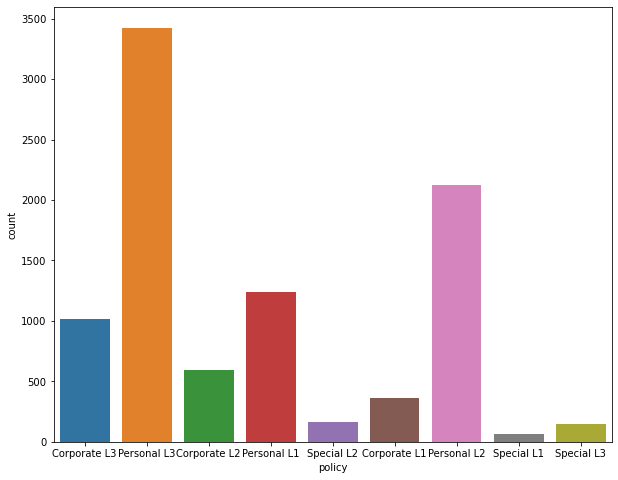

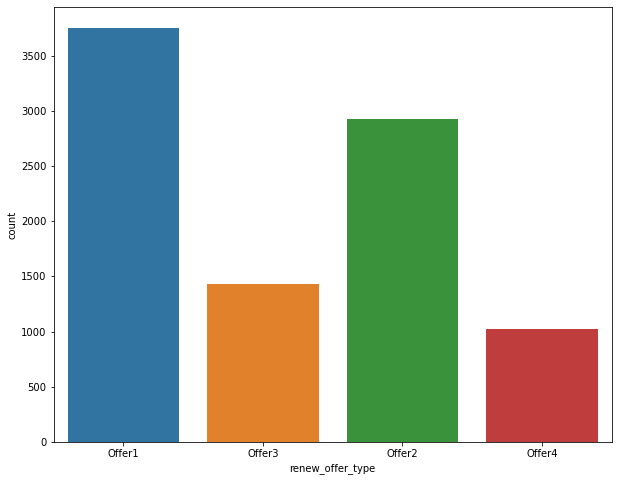

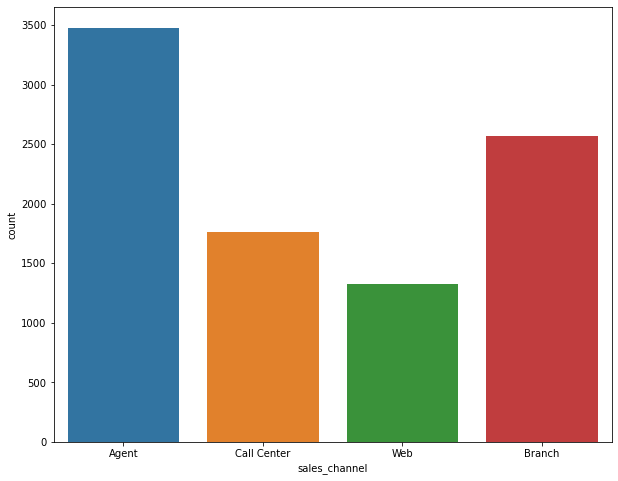

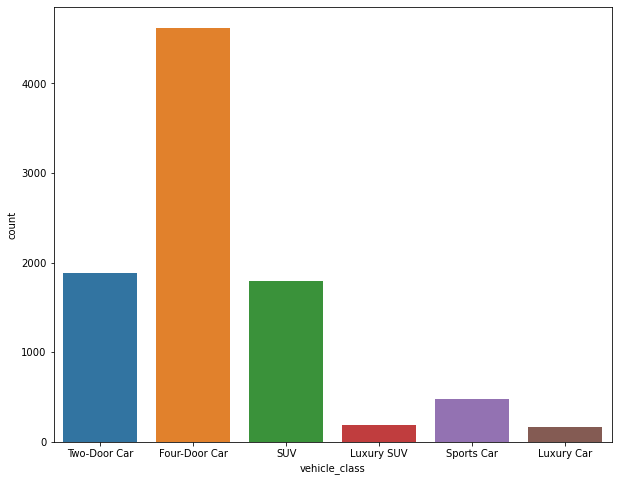

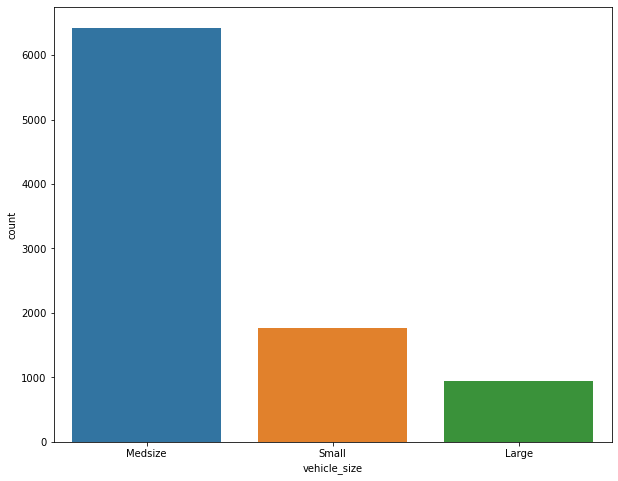

In [30]:
for col in categoricals0.columns:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.countplot(categoricals0[col])
    plt.show()

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [81]:
for col in customer_df0:
    print(customer_df0[col].value_counts(), '\n')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

2300.691547     6
6057.072080     6
6005.214792     6
8819.018934     6
4984.618655     6
               ..
12206.892080    1
3728.830130     1
2456.816647     1
2675.029491     1
4491.909095     1
Name: customer_lifetime_value, Length: 8041, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-03    178
2011-01-31    178
2011-01-20    173
2011-01-28    169
2011-02-26    169
2011-02-19    168
2011-02-27    167
2011-01-05    167
2011-01-11    166
2011-02-04    164
2011-02-28    161

4. Plot time variable. Can you extract something from it?

In [82]:
len(customer_df0['effective_to_date'].unique())

59

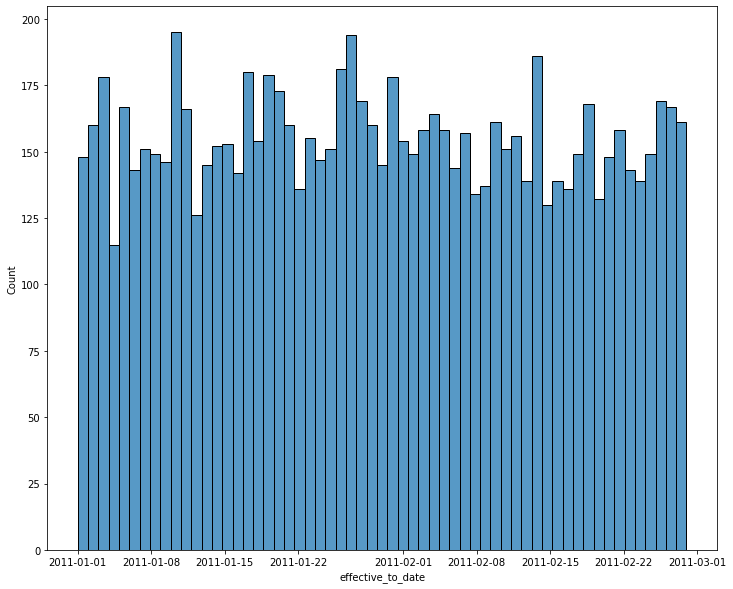

In [83]:
plt.subplots(figsize=(12, 10))
sns.histplot(customer_df0['effective_to_date'], bins = len(customer_df['effective_to_date'].unique()))
plt.show()

# Lab 4 | Data cleaning and wrangling

### Instructions

So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

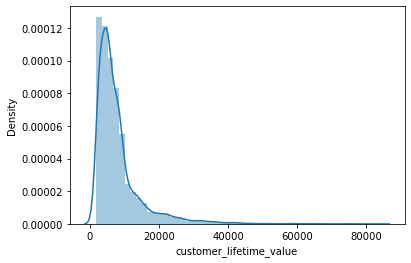

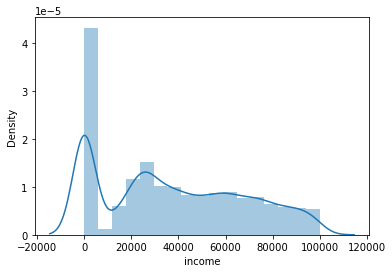

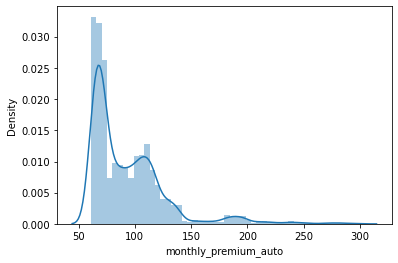

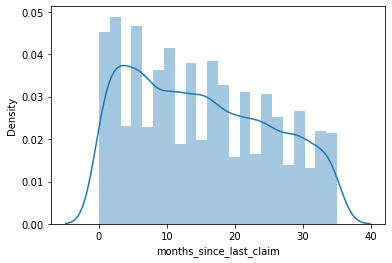

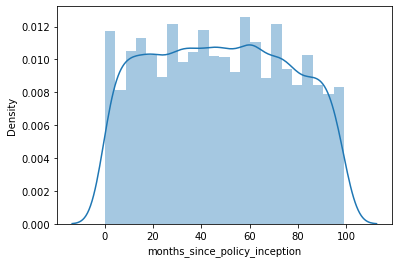

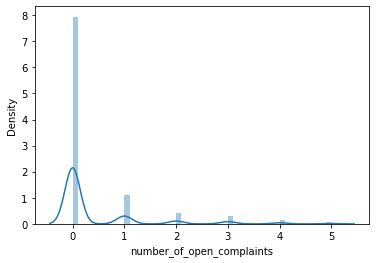

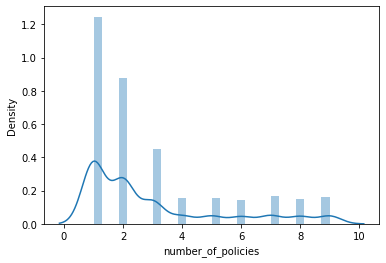

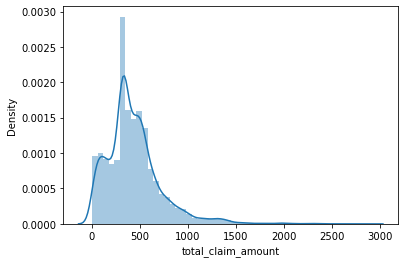

In [84]:
for col in customer_df0.select_dtypes(np.number).columns:
    sns.distplot(customer_df0[col])
    plt.show()

There are some zero values in 'income' column that seem unrealistic. Let's see what happens if we drop them

In [85]:
customer_df1 = customer_df0[customer_df0['income'] > 0]
customer_df1.shape

(6817, 23)

In [86]:
customer_df0.shape

(9134, 23)

Here we notice that if we drop zero income values, we lose 25% of the rows - this is too much. 

Let's see applying a log in continuous values 

In [87]:
log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) and x!=0 else np.NAN

In [91]:
continuous2 = continuous0.copy()

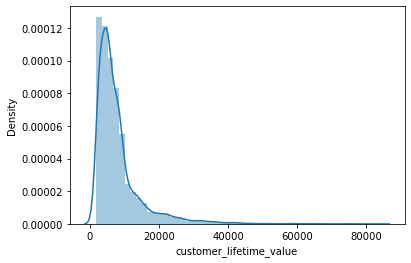

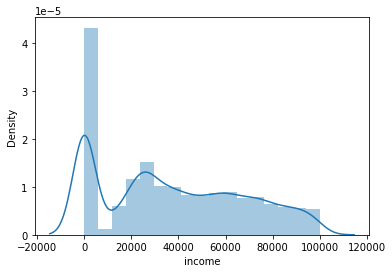

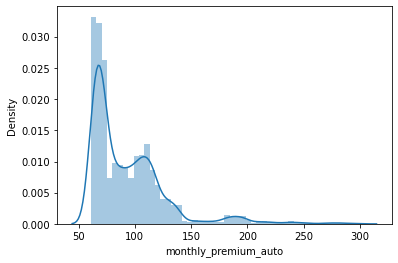

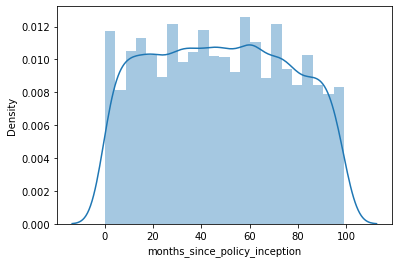

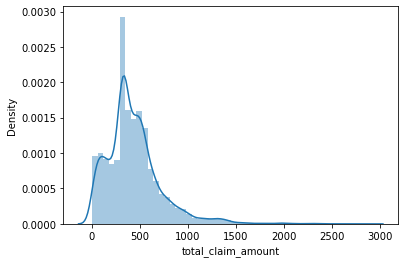

In [93]:
for col in continuous2.columns:
    sns.distplot(continuous2[col])
    plt.show()

In [94]:
for col in continuous2.columns:
    continuous2[col] = continuous2[col].apply(log_lmbda)
    continuous2[col] = continuous2[col].fillna(np.median(continuous2[col]))

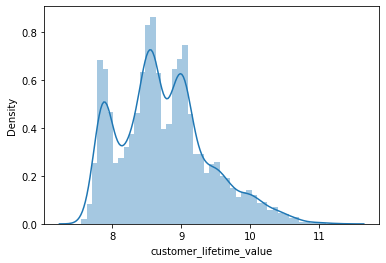

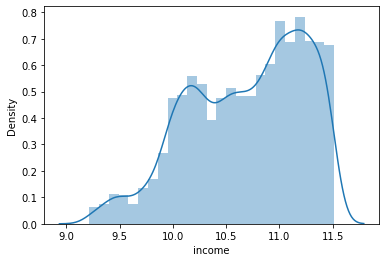

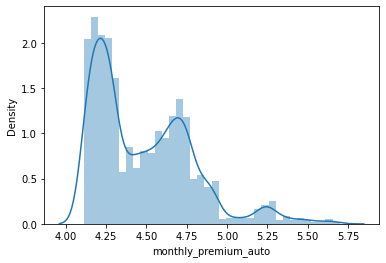

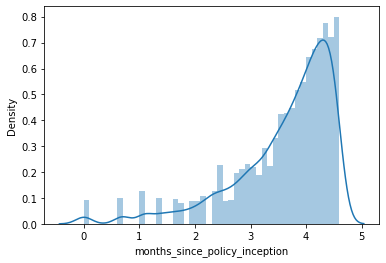

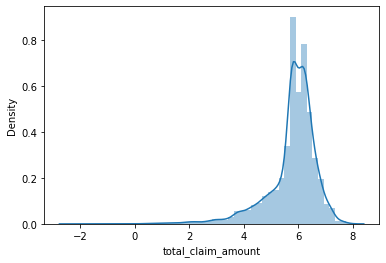

In [95]:
for col in continuous2.columns:
    sns.distplot(continuous2[col])
    plt.show()

In [97]:
discrete2 = discrete0.copy()

In [100]:
df_num2 = pd.concat([discrete2, continuous2], axis=1)
df_num2

,months_since_last_claim,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
customer,,,,,,,,
BU79786,32,0,1,7.924260,10.937988,4.234107,1.609438,5.952753
QZ44356,13,0,8,8.850738,NaN,4.543295,3.737670,7.031268
AI49188,18,0,2,9.464008,10.794809,4.682131,3.637586,6.339428
WW63253,18,0,7,8.941920,NaN,4.663439,4.174387,6.272653
HB64268,12,0,1,7.942253,10.688211,4.290459,3.784190,4.928202
...,...,...,...,...,...,...,...,...
LA72316,18,0,2,10.060747,11.183602,4.290459,4.488636,5.289452
PK87824,14,0,1,8.038031,9.980634,4.369448,3.332205,5.938064
TD14365,9,3,2,9.007476,NaN,4.442651,3.610918,6.673026


In [37]:
customer_df2 = customer_df0.copy()

In [38]:
numericals2 = customer_df2.select_dtypes(np.number)
numericals2

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


In [40]:
for col in customer_df2.select_dtypes(np.number).columns:
    customer_df2[col] = customer_df2[col].apply(log_lmbda)
    customer_df2[col] = customer_df2[col].fillna(np.mean(customer_df2[col]))

In [41]:
customer_df2.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,7.924260,No,Basic,Bachelor,2011-02-24,Employed,F,10.937988,Suburban,Married,4.234107,3.465736,1.609438,0.465844,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,5.952753,Two-Door Car,Medsize
QZ44356,Arizona,8.850738,No,Extended,Bachelor,2011-01-31,Unemployed,F,10.694229,Suburban,Single,4.543295,2.564949,3.737670,0.465844,2.079442,Personal Auto,Personal L3,Offer3,Agent,7.031268,Four-Door Car,Medsize
AI49188,Nevada,9.464008,No,Premium,Bachelor,2011-02-19,Employed,F,10.794809,Suburban,Married,4.682131,2.890372,3.637586,0.465844,0.693147,Personal Auto,Personal L3,Offer1,Agent,6.339428,Two-Door Car,Medsize
WW63253,California,8.941920,No,Basic,Bachelor,2011-01-20,Unemployed,M,10.694229,Suburban,Married,4.663439,2.890372,4.174387,0.465844,1.945910,Corporate Auto,Corporate L2,Offer1,Call Center,6.272653,SUV,Medsize
HB64268,Washington,7.942253,No,Basic,Bachelor,2011-02-03,Employed,M,10.688211,Rural,Single,4.290459,2.484907,3.784190,0.465844,0.000000,Personal Auto,Personal L1,Offer1,Agent,4.928202,Four-Door Car,Medsize


In [42]:
customer_df2.shape

(9134, 23)

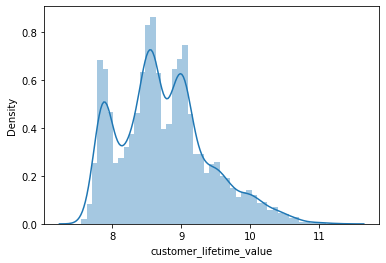

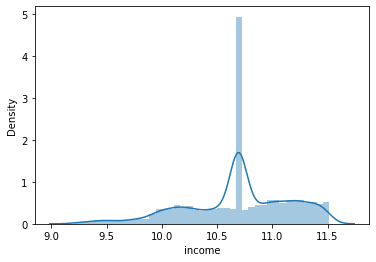

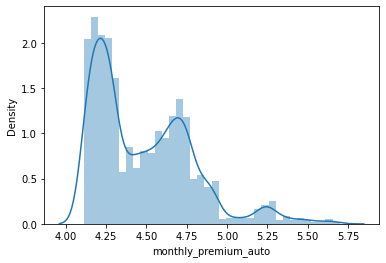

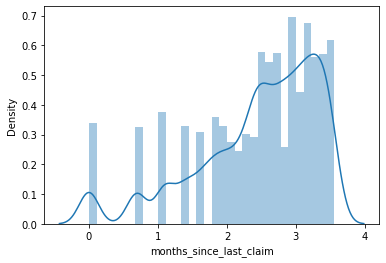

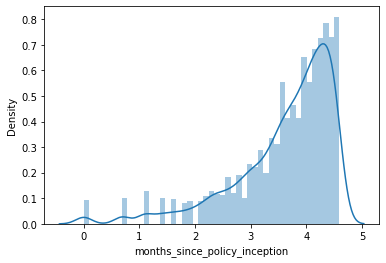

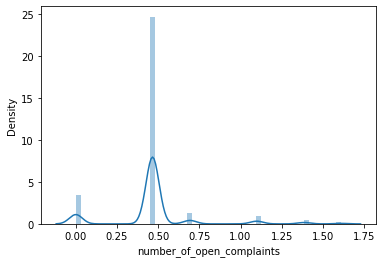

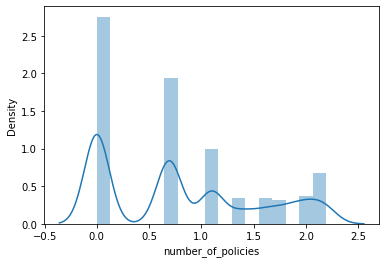

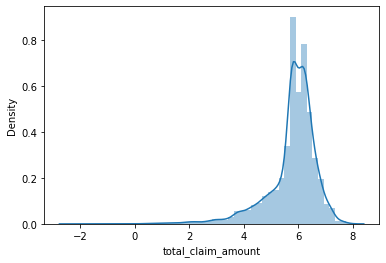

In [43]:
for col in customer_df2.select_dtypes(np.number).columns:
    sns.distplot(customer_df2[col])
    plt.show()

def remove_outliers(df3, threshold=2, in_columns=df3.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df3[column],75)
            lower = np.percentile(df3[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df3 = df3[(df3[column]>lower_limit) & (df3[column]<upper_limit)]
    return df3

2. Create a copy of the dataframe for the data wrangling.

In [48]:
data_wrangling = customer_df2.copy()

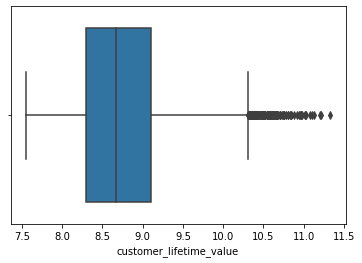

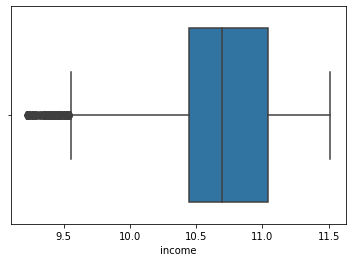

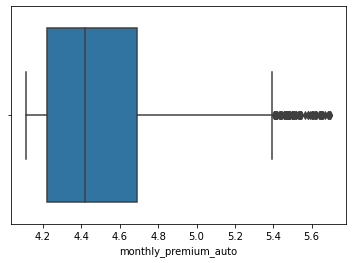

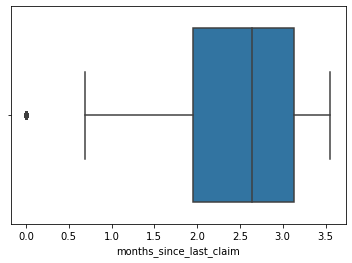

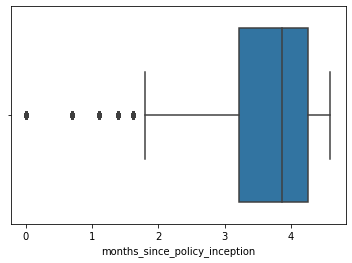

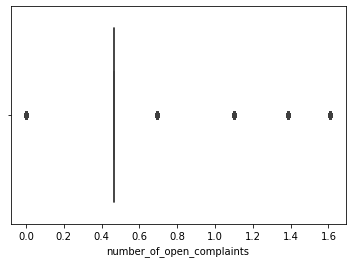

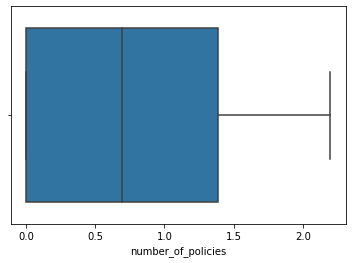

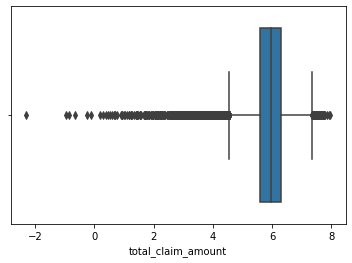

In [49]:
for col in data_wrangling.select_dtypes(np.number).columns:
    sns.boxplot(data_wrangling.select_dtypes(np.number)[col])
    plt.show()

import scipy.stats as stats
def boxcox_transform(customer_df0):
    numeric_cols = customer_df0.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        customer_df0[column] = np.where(customer_df0[column]<=0, np.NAN, customer_df0[column]) 
        customer_df0[column] = customer_df0[column].fillna(customer_df0[column].median())
        transformed_data, ci = stats.boxcox(customer_df0[column])
        customer_df0[column] = transformed_data
        _ci[column] = ci #ci means confidence interval
    return customer_df0, _ci

customer_df0, _ci = boxcox_transform(customer_df0)
_ci

summary = numericals.describe().T
summary['iqr'] = summary['75%']-summary['25%']

3. Normalize the continuous variables. You can use any one method you want.

4. Encode the categorical variables

5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

sns.distplot(numericals['customer_lifetime_value'])

customer_df1['year'] = pd.DatetimeIndex(customer_df1['effective_to_date']).year
customer_df1['month'] = pd.DatetimeIndex(customer_df1['effective_to_date']).month
customer_df1['week'] = pd.DatetimeIndex(customer_df1['effective_to_date']).week
customer_df1['day'] = pd.DatetimeIndex(customer_df1['effective_to_date']).day
print(customer_df1['year'], '\n') 
print(customer_df1['month'], '\n')
print(customer_df1['week'], '\n') 
print(customer_df1['day'], '\n')

6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.